<a href="https://colab.research.google.com/github/iamaarushi/ALY6110/blob/main/ALY6110_Aarushi_Module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [ ]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [ ]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [ ]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [ ]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [ ]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

# Load Data to Spark Cluster

In [ ]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [ ]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [ ]:

dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")


# Show data from Hive Table

In [ ]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



## **Task 1**

In [ ]:
#1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 7")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [ ]:
#2: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


## **TASK 2**

In [ ]:
#1 Descriptive stat

#1
# Mean of "medv"
mean_medv = spark.sql("SELECT AVG(medv) AS mean_medv FROM bostonh.bos_housing").collect()[0]["mean_medv"]
print("Mean of medv:", mean_medv)

# Standard Deviation of "medv"
stddev_medv = spark.sql("SELECT STDDEV(medv) AS stddev_medv FROM bostonh.bos_housing").collect()[0]["stddev_medv"]
print("Standard Deviation of medv:", stddev_medv)

# Minimum of "medv"
min_medv = spark.sql("SELECT MIN(medv) AS min_medv FROM bostonh.bos_housing").collect()[0]["min_medv"]
print("Minimum of medv:", min_medv)

# Maximum of "medv"
max_medv = spark.sql("SELECT MAX(medv) AS max_medv FROM bostonh.bos_housing").collect()[0]["max_medv"]
print("Maximum of medv:", max_medv)



Mean of medv: 22.532806324110698
Standard Deviation of medv: 9.197104087379815
Minimum of medv: 5.0
Maximum of medv: 50.0


In [ ]:
#2
# Mean of "rm"
mean_rm = spark.sql("SELECT AVG(rm) AS mean_rm FROM bostonh.bos_housing").collect()[0]["mean_rm"]
print("Mean of rm:", mean_rm)

Mean of rm: 6.284634387351787


## **TASK 3**

In [ ]:
#1:  property with the highest crime rate ("crim"). Provide details about this property.
spark.sql("SELECT * FROM bostonh.bos_housing WHERE crim = (SELECT MAX(crim) FROM bostonh.bos_housing)").show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [ ]:
#2: property with the lowest median home value ("medv"). Include its details.
spark.sql("SELECT * FROM bostonh.bos_housing WHERE medv = (SELECT MIN(medv) FROM bostonh.bos_housing)").show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



## **TASK 4**

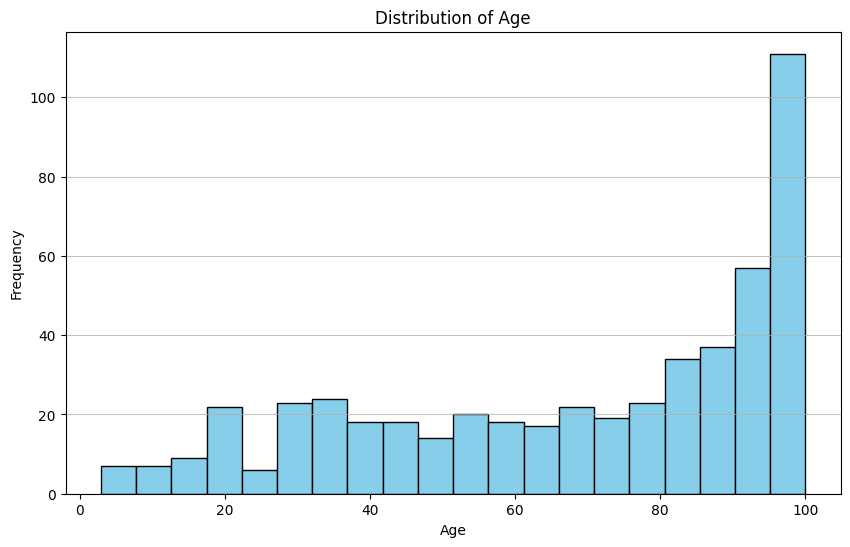

In [ ]:
#1:histogram showing the distribution of the "age" column.

# Import necessary libraries
import matplotlib.pyplot as plt

# Query to get the age distribution
age_distribution = spark.sql("SELECT age FROM bostonh.bos_housing").toPandas()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(age_distribution["age"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
#2:  percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River).

# Calculate the percentage of properties with chas=1
properties_with_chas_1 = spark.sql("SELECT COUNT(*) AS count FROM bostonh.bos_housing WHERE chas = 1").collect()[0]["count"]
total_properties = spark.sql("SELECT COUNT(*) AS total FROM bostonh.bos_housing").collect()[0]["total"]

percentage_chas_1 = (properties_with_chas_1 / total_properties) * 100
print("Percentage of properties with chas=1:", percentage_chas_1)

Percentage of properties with chas=1: 6.91699604743083


## **TASK 5**

In [ ]:
#1: correlation coefficient between "rm" and "medv." Explain the relationship between the average number of rooms and median home value.
correlation_rm_medv = spark.sql("SELECT corr(rm, medv) AS correlation FROM bostonh.bos_housing").collect()[0]["correlation"]
print("Correlation coefficient between rm and medv:", correlation_rm_medv)

Correlation coefficient between rm and medv: 0.6953599470715401


In [ ]:
#2: correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration). Report your findings.
correlation_ptratio_nox = spark.sql("SELECT corr(ptratio, nox) AS correlation FROM bostonh.bos_housing").collect()[0]["correlation"]
print("Correlation coefficient between ptratio and nox:", correlation_ptratio_nox)


Correlation coefficient between ptratio and nox: 0.18893267711276893


## **TASK 6**

In [ ]:
#1: HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").
spark.sql("SELECT * FROM bostonh.bos_housing ORDER BY medv DESC LIMIT 5").show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [ ]:
#2: average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.
spark.sql("SELECT AVG(IF(chas = 1, age, NULL)) AS avg_age_chas_1, AVG(IF(chas = 0, age, NULL)) AS avg_age_chas_0 FROM bostonh.bos_housing").show()

+-----------------+-----------------+
|   avg_age_chas_1|   avg_age_chas_0|
+-----------------+-----------------+
|77.50000000000001|67.91167728237794|
+-----------------+-----------------+



## **TASK 7**

In [ ]:
#1:  Hive view named "property_age_view" that includes the "age" and "medv" columns
spark.sql("CREATE OR REPLACE TEMPORARY VIEW property_age_view AS \
           SELECT age, medv FROM bostonh.bos_housing")
spark.sql("SELECT * FROM property_age_view").show()


+-----+----+
|  age|medv|
+-----+----+
| 65.2|24.0|
| 78.9|21.6|
| 61.1|34.7|
| 45.8|33.4|
| 54.2|36.2|
| 58.7|28.7|
| 66.6|22.9|
| 96.1|27.1|
|100.0|16.5|
| 85.9|18.9|
| 94.3|15.0|
| 82.9|18.9|
| 39.0|21.7|
| 61.8|20.4|
| 84.5|18.2|
| 56.5|19.9|
| 29.3|23.1|
| 81.7|17.5|
| 36.6|20.2|
| 69.5|18.2|
+-----+----+
only showing top 20 rows



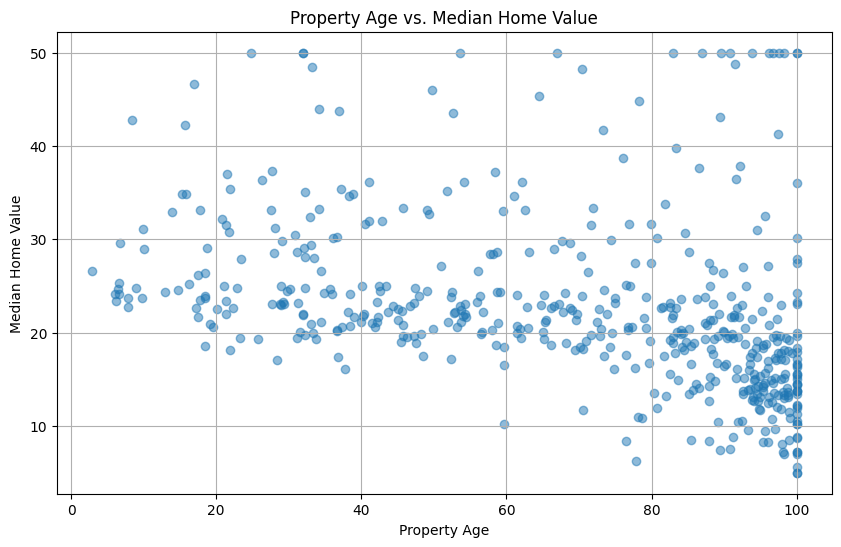

In [ ]:
#2:  property age against median home value using a data visualization tool of your choice.
# Convert Spark DataFrame to Pandas DataFrame
property_age_pd = spark.sql("SELECT age, medv FROM property_age_view").toPandas()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(property_age_pd['age'], property_age_pd['medv'], alpha=0.5)
plt.title('Property Age vs. Median Home Value')
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()

## **TASK 8**

In [ ]:
#1:  properties with a "crim" value greater than 10 (considered as potential outliers).
outlier_properties = spark.sql("""
    SELECT *
    FROM bostonh.bos_housing
    WHERE crim > 10
""")
outlier_properties.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

## **TASK 9**

In [ ]:
# hypothesis about the impact of the "rm" (average number of rooms) on median home value.
# Null Hypothesis: There exists no relationship between the variables rm and medv.
# Alternate Hypothesis: There exists a linear relationship between the variables rm and medv.


hypothesis_test = """
WITH stats AS (
    SELECT
        AVG(medv) AS avg_medv,
        AVG(rm) AS avg_rm,
        VAR_POP(rm) AS var_rm,
        COVAR_POP(rm, medv) AS covar_rm_medv
    FROM bostonh.bos_housing
)
SELECT
    covar_rm_medv / var_rm AS slope,
    avg_medv - (covar_rm_medv / var_rm) * avg_rm AS intercept
FROM stats
"""

spark.sql(hypothesis_test).show()


+----------------+------------------+
|           slope|         intercept|
+----------------+------------------+
|9.10210898118032|-34.67062077643868|
+----------------+------------------+

